In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [3]:
'''helper fucntions for batch splitting'''

class time_series_data():
    def __init__(self,n_pts,xmin,xmax):
        self.xmin = xmin
        self.xmax = xmax
        self.n_pts = n_pts
        
        self.resol = (xmax-xmin)/n_pts
        self.xdata = np.linspace(xmin,xmax,n_pts)
        
        self.y_true = np.sin(self.xdata)
        
    def ret_true(self,x_seris):
        return np.sin(x_seris)
    
    def next_batch(self,size,steps,return_batch = False):
        rand_start = np.random.rand(size,1)
        ts_start = rand_start *(self.xmax - self.xmin - (steps*self.resol))
        
        batch_ts = ts_start + np.arange(0.0,steps+1)*self.resol
        
        y_ts = np.sin(batch_ts)
        
        if return_batch:
            return y_ts[:,:-1].reshape(-1,steps,1) , y_ts[:,1:].reshape(-1,steps,1), batch_ts
        else:
            return y_ts[:,:-1].reshape(-1,steps,1) , y_ts[:,1:].reshape(-1,steps,1)

In [4]:
ts_data = time_series_data(250,0,10) # time series data

In [5]:
n=30
y1,y2,x = ts_data.next_batch(1,n,True)

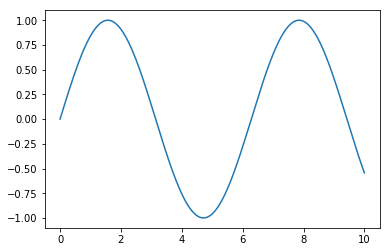

In [6]:
plt.plot(ts_data.xdata,ts_data.y_true)

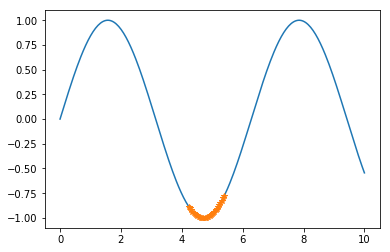

In [7]:
# random series in a sine wave

plt.plot(ts_data.xdata,ts_data.y_true)

plt.plot(x.flatten()[1:], y2.flatten(),'*')

In [9]:
# RNN generation prarameters

n_input=1
n_neurons = 100
n_optput = 1
learn_rate = 0.0001
n_iterations = 1
batch_size = 1
num_time_steps = 20

In [10]:
# place holders

x = tf.placeholder(tf.float32,shape=[None,num_time_steps, n_input])
y = tf.placeholder(tf.float32, shape=[None,num_time_steps,n_output])

In [11]:
# cell states

cell = tf.contrib.rnn.GRUCell(num_units=n_neurons,activation=tf.nn.relu)
cell = tf.contrib.rnn.OutputProjectionWrapper(cell, output_size=n_optput)

In [12]:
# final output

output, states = tf.nn.dynamic_rnn(cell, x, dtype=tf.float32)

In [13]:
# optimization

loss = tf.reduce_mean(tf.square(output-y))
optimize = tf.train.AdamOptimizer(learning_rate=lear_rate)
train = optimize.minimize(loss)

In [14]:
saver = tf.train.Saver()

In [15]:
# optimization

with tf.Session() as sess:    
    
    sess.run(tf.global_variables_initializer())
    
    for i in range(2000):
        xb,yb = ts_data.next_batch(batch_size,num_time_steps)
        sess.run(train, feed_dict = {x:xb,y:yb})
        
        mse = loss.eval(feed_dict={x:xb,y:yb})
    saver.save(sess,"./rnn_time")
        

In [17]:
train_int = np.linspace(5,5+ts_data.resol*(num_time_steps+1), num_time_steps+1)

In [19]:
'''training session'''

with tf.Session() as sess:
    saver.restore(sess,"./rnn_time")
    
    xn = np.sin(np.array(train_int[:-1].reshape(-1,num_time_steps,n_inp)))
    y_pred = sess.run(opt,feed_dict={x:xn})

INFO:tensorflow:Restoring parameters from ./rnn_time


In [ ]:
'''restoring the trained RNN to predict the series '''

with tf.Session() as sess:
    saver.restore(sess,"./rnn_time")
    
    zer = [0.0 for i in range(num_time_steps)]
    for i in range(len(ts_data.xdata)-num_time_steps):
        xb = np.array(zer)
    

In [22]:
zer = [i for i in range(5)]
zer[-5:]

[0, 1, 2, 3, 4]